In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
from pandas import to_datetime
from pandas import DataFrame
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# md_dict,xt_dict,yt_dict,zt_dict = {}, {}, {}, {}
# dict_1 = {'group':[],'well_name':[],
#         # 'Prophet_train_r2':[],'Prophet_train_mae':[],'Prophet_train_rmse':[],
#         'Prophet_test_r2':[],'Prophet_test_mae':[],'Prophet_test_rmse':[]}
# df_result = pd.DataFrame(dict_1)

path = "/content/drive/My Drive/Python/OilProduction/Revision/data/"
filenames = glob(path+'export/Wilson*.csv')
df_1 = pd.DataFrame()
for filename in filenames: 
    # df = pd.read_csv(filename)
    # well = str(filename[-17:-4])
    csv_name = filename[66:-4]
    group = csv_name.split('_')[0]
    method = csv_name.split('_')[-1]

    df = pd.read_csv(filename)
    df_1[method] = df.iloc[:,-1]

# df_1.to_csv(path+'/export/Summary_'+group+'.csv',index=False)
# print(df_1)

     ARIMA   LSTM  Prophet
0     8.27   2.09    14.18
1     7.49  12.79    16.97
2     2.68  18.50    35.71
3     3.27  18.73     7.65
4     5.92   9.64    14.69
5     9.20   9.02    11.12
6    48.72   8.48    84.71
7    27.50  23.78   126.36
8     3.84  17.39    30.61
9    16.35   2.72    16.23
10    6.23  20.10    12.86
11   35.31   4.53    29.83
12    3.10  21.11    26.20
13    4.61   2.38    10.92
14   10.48   8.73    11.99
15    9.18   7.82     6.62
16    8.48  13.77    15.71
17   12.05  24.92    75.28
18   17.84   6.07    27.61
19    9.43   6.94    46.41
20   17.66  49.50    23.85
21    5.91   6.05    44.55
22  128.77  24.29    29.47
23    5.36   3.29     7.33
24   28.56  16.05    27.15
25   10.54   8.50     9.12
26    9.51  19.25    25.34
27   60.53   5.34    51.35


In [73]:
pd.DataFrame(np.random.rand(17,3), columns=['A','B','C'])

,A,B,C
0,0.521904,0.485408,0.187835
1,0.477412,0.803389,0.414153
2,0.617915,0.943751,0.908374
3,0.246629,0.002495,0.192650
4,0.176234,0.904519,0.531281
5,0.329241,0.441960,0.290143
6,0.768975,0.742497,0.459926
7,0.675450,0.493536,0.486753
8,0.511666,0.291144,0.206289
9,0.934425,0.761016,0.576695


0 /content/drive/My Drive/Python/OilProduction/Revision/data/export/Summary_Wishbone.csv
1 /content/drive/My Drive/Python/OilProduction/Revision/data/export/Summary_Gobbler.csv
2 /content/drive/My Drive/Python/OilProduction/Revision/data/export/Summary_CritterCreek.csv
3 /content/drive/My Drive/Python/OilProduction/Revision/data/export/Summary_Wilson.csv


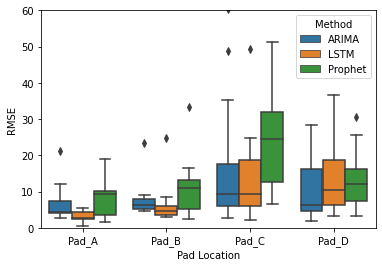

In [92]:
path = "/content/drive/My Drive/Python/OilProduction/Revision/data/"
filenames = glob(path+'export/Summary*.csv')

for i, filename in enumerate(filenames): 
    # data = pd.read_csv(filename)
    print (i,filename)
data_Wishbone = pd.read_csv(filenames[0]).assign(Location='Pad_A')
data_Gobbler = pd.read_csv(filenames[1]).assign(Location='Pad_B')
data_Wilson = pd.read_csv(filenames[3]).assign(Location='Pad_C')
data_CritterCreek = pd.read_csv(filenames[2]).assign(Location='Pad_D')
# print (data_CritterCreek)

cdf = pd.concat([data_Wishbone, data_Gobbler, data_Wilson,data_CritterCreek])  
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Method']) 
# print (mdf)
ax = sns.boxplot(x="Location", y="value", hue="Method", data=mdf) 
ax.set_ylim([0, 60])  
ax.set(xlabel='Pad Location',ylabel='RMSE') 
plt.show()
savepath = path+'export/'
ax.figure.savefig(savepath + 'Summary_RMSE.jpg',dpi=300)

#     group = filename[74:-4]
#     data_{}.format(i) = pd.read_csv(filename).assign(Location=(i+1))
#     # data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C'])

In [ ]:
data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)

cdf = pd.concat([data1, data2, data3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
print(mdf.head())

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116

ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf)    
plt.show()